In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import regionmask

# AMO Index (Hadisst-fed)

In [2]:
df = pd.read_csv('amo_monthly_10yrLP.csv', sep='\s+', index_col=0, header=None, parse_dates=True)

In [3]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1870.0,-0.02,-0.02,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
1871.0,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.00,0.00
1872.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1873.0,0.00,0.00,0.00,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.02
1874.0,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...
2017.0,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
2018.0,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
2019.0,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00


In [7]:
ds = xr.Dataset(data_vars=dict(sst = (['time'], df.to_numpy().flatten())), 
                coords={'time': pd.date_range('1870', '2022', freq='ME')},
                attrs={'description':'Atlantic Multidecadal Oscillation Index (10yr Low-Pass, Monthly). \n Data from https://climatedataguide.ucar.edu/climate-data/atlantic-multi-decadal-oscillation-amo'})

In [8]:
ds

<xarray.Dataset> Size: 29kB
Dimensions:  (time: 1824)
Coordinates:
  * time     (time) datetime64[ns] 15kB 1870-01-31 1870-02-28 ... 2021-12-31
Data variables:
    sst      (time) float64 15kB -0.02 -0.02 -0.01 ... -999.0 -999.0 -999.0
Attributes:
    description:  Atlantic Multidecadal Oscillation Index (10yr Low-Pass, Mon...

In [9]:
sst = ds.sst.where(ds.sst!=-999., np.nan)

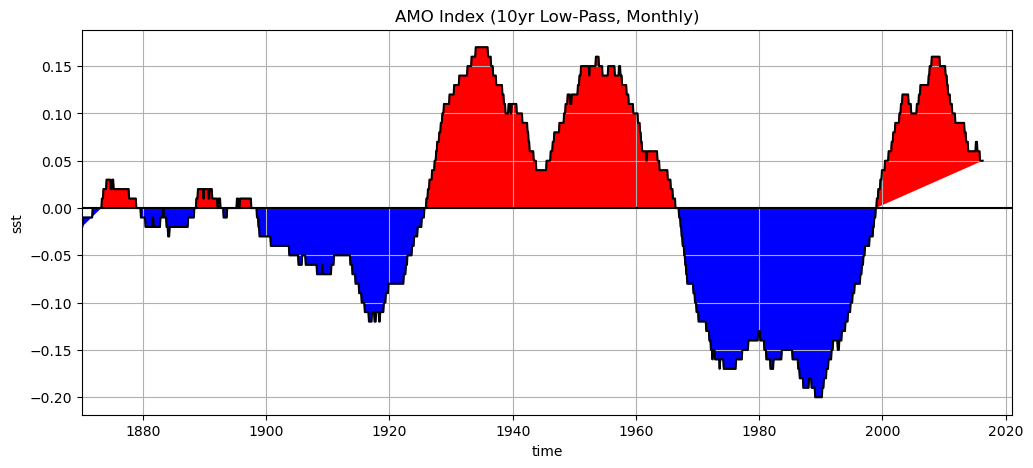

In [10]:
plt.figure(figsize=(12,5))
sst.plot(color='k')
plt.fill(sst.time, sst.where(sst>=0), color='r')
plt.fill(sst.time, sst.where(sst<=0), color='b')
plt.axhline(y=0, color='k')
plt.xlim(sst.time.sel(time='1870', method='nearest'), sst.time.sel(time='2021', method='nearest'))
plt.title('AMO Index (10yr Low-Pass, Monthly)')
plt.grid();

In [70]:
sst.to_dataset().to_netcdf('/work5/stb/MHW-gfdl/compare_avgs_trends/amo_index.nc')

# OISST-fed AMO index

In [2]:
ds = xr.open_dataset('oisst-monthly-NATL.nc', chunks={})

In [3]:
ds

<xarray.Dataset> Size: 396MB
Dimensions:  (time: 529, lon: 520, lat: 360)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-09-01
  * lon      (lon) float32 2kB -99.88 -99.62 -99.38 -99.12 ... 29.38 29.62 29.88
  * lat      (lat) float32 1kB 0.125 0.375 0.625 0.875 ... 89.38 89.62 89.88
Data variables:
    sst      (time, lat, lon) float32 396MB dask.array<chunksize=(1, 360, 520), meta=np.ndarray>
Attributes:
    CDI:            Climate Data Interface version 1.9.10 (https://mpimet.mpg...
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    institution:    NOAA/National Centers for Environmental Information
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...
    CDO:            Climate Data Operators version 1.9.10 (https://mpimet.mpg...
    history:        06-Oct-2025 13:48:40 Subset NOAA/PSL

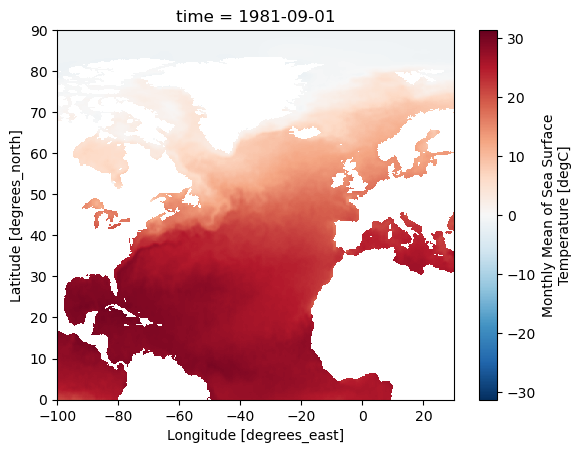

In [4]:
ds.sst[0].plot()

In [7]:
basins = regionmask.defined_regions.natural_earth_v5_1_2.ocean_basins_50

In [33]:
regionmask.Regions?

Init signature:
regionmask.Regions(
    outlines,
    numbers=None,
    names=None,
    abbrevs=None,
    name: 'str' = 'unnamed',
    source: 'str | None' = None,
    overlap: 'bool | None' = None,
) -> 'None'
Docstring:     
class for plotting regions and creating region masks

Parameters
----------
outlines : iterable or dict of: Nx2 array of vertices, Polygon or MultiPolygon
    List of the coordinates of the vertices (outline) of the region as
    shapely Polygon/ MultiPolygon or list.
numbers : iterable of int, optional
    List of numerical indices for every region. Default: range(0, len(outlines))
names : iterable or dict of string, optional
    Long name of each region. Default: ["Region0", .., "RegionN"]
abbrevs : iterable or dict of string, optional
    Abbreviations of each region. Default: ["r0", ..., "rN"]
name : string, optional
    Name of the collection of regions. Default: "unnamed"
source : string, optional
    Source of the region definitions. Default: "".
overlap :

In [12]:
basins

<regionmask.Regions 'Natural Earth: ocean basins 50m'>
Source:   http://www.naturalearthdata.com
overlap:  False

Regions:
  0         Arctic Ocean         Arctic Ocean
  1       SOUTHERN OCEAN       SOUTHERN OCEAN
  2 North Atlantic Ocean North Atlantic Ocean
  3  North Pacific Ocean  North Pacific Ocean
  4  South Pacific Ocean  South Pacific Ocean
 ..                  ...                  ...
112           Ungava Bay           Ungava Bay
113         Amazon River         Amazon River
114        Yangtze River        Yangtze River
115       Columbia River       Columbia River
116         Korea Strait         Korea Strait

[117 regions]

<GeoAxes: >

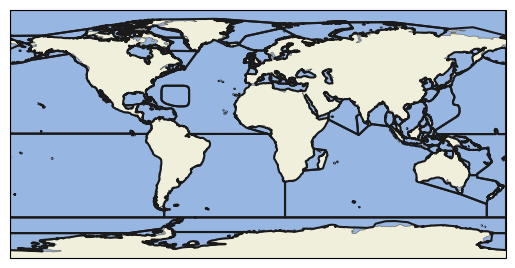

In [19]:
basins.plot(add_coastlines=True, add_label=False, add_land=True, add_ocean=True)

In [31]:
basins.plot(add_coastlines=True, add_label=False, add_land=True, add_ocean=True)

AttributeError: 'Regions' object has no attribute 'where'

In [30]:
basins.regions[2]

<regionmask._OneRegion: North Atlantic Ocean (North Atlantic Ocean / 2)>

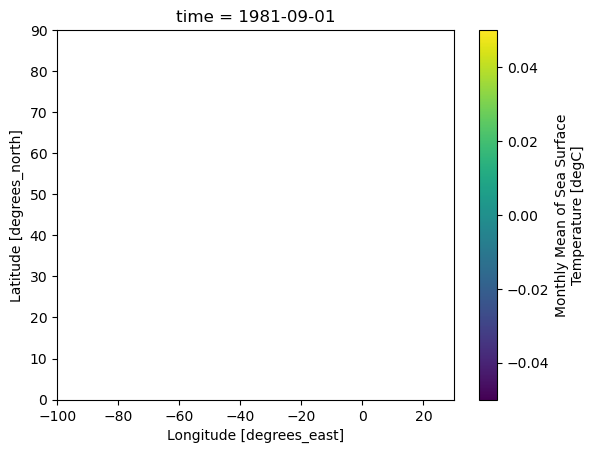

In [28]:
basins.regions
ds.sst.where(mask==2).isel(time=0).plot()

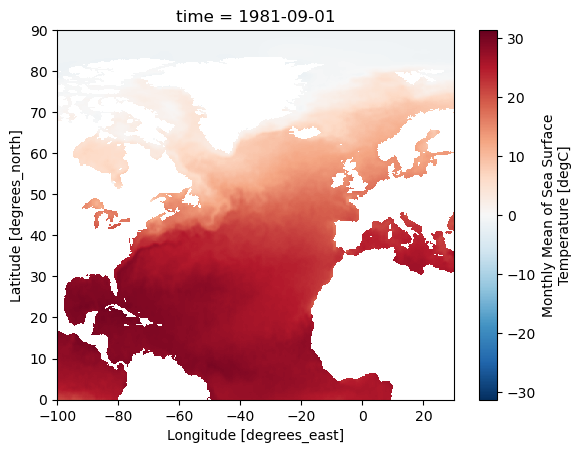

In [4]:
ds.sst[0].plot()

In [34]:
m = xr.open_dataset('RECCAP2_region_masks_all_v20221025.nc', chunks={})

In [38]:
m

<xarray.Dataset> Size: 523kB
Dimensions:     (lat: 180, lon: 360)
Coordinates:
  * lon         (lon) float64 3kB 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat         (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Data variables:
    seamask     (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    coast       (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    open_ocean  (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    atlantic    (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    pacific     (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    indian      (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    arctic      (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
    southern    (lat, lon) int8 65kB dask.array<chunksize=(180, 360), meta=np.ndarray>
Attributes:
    date:         2022-06-20
    contact:      gregorl@ethz.ch
    description:  regional masks created for the RECCAP2 ocean chapters. The ...
    helper_code:  The following snippet of code can be used to list the regio...

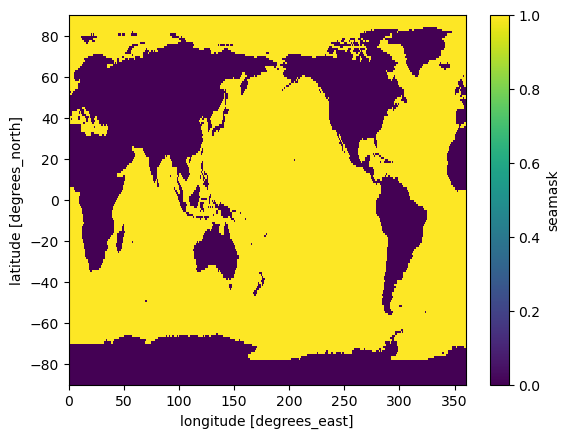

In [39]:
m.seamask.plot()

In [49]:
ds.sst[0].coords

Coordinates:
    time     datetime64[ns] 8B 1981-09-01
  * lon      (lon) float32 2kB -99.88 -99.62 -99.38 -99.12 ... 29.38 29.62 29.88
  * lat      (lat) float32 1kB 0.125 0.375 0.625 0.875 ... 89.38 89.62 89.88

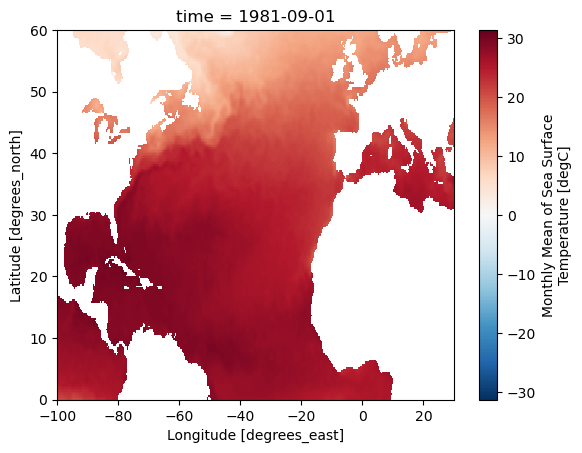

In [56]:
ds.sst.sel(lat=slice(None, 60))[0].plot()

In [59]:
import xgcm
grid = xgcm.Grid(m, periodic=('X', 'Y'))
grid

<xgcm.Grid>

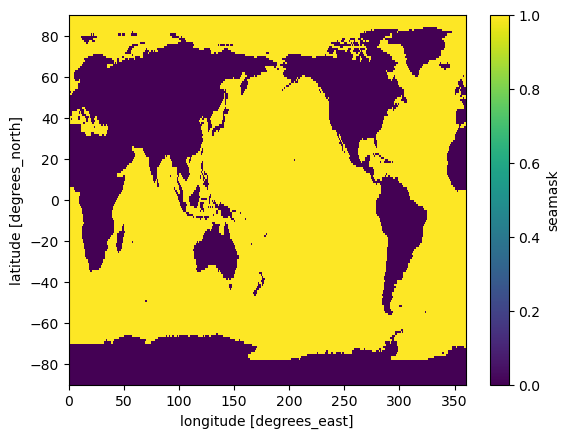

In [65]:
m.seamask.plot()

In [87]:
da = xr.DataArray(data=m.seamask.roll(lon=180), coords={'lon':np.arange(-179,181),
                                                        'lat':m.lat})

In [97]:
m_new1 = m.roll(lon=180)
m_new = m_new1.assign_coords(lon=np.arange(-179,181))

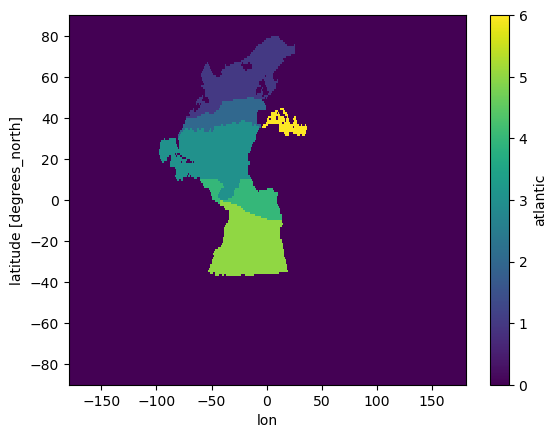

In [100]:
m_new.atlantic.plot()

In [89]:
da.shape

(180, 360)

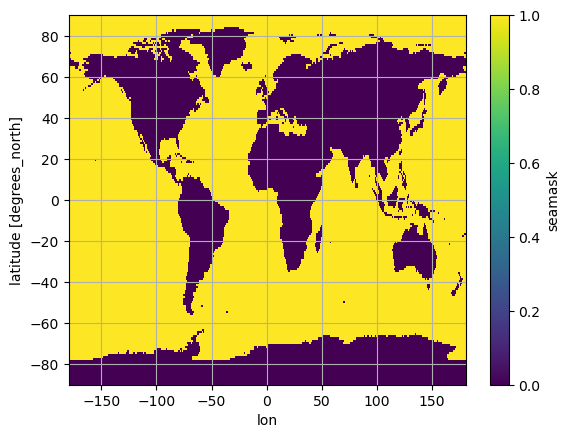

In [90]:
da.plot()
plt.grid()

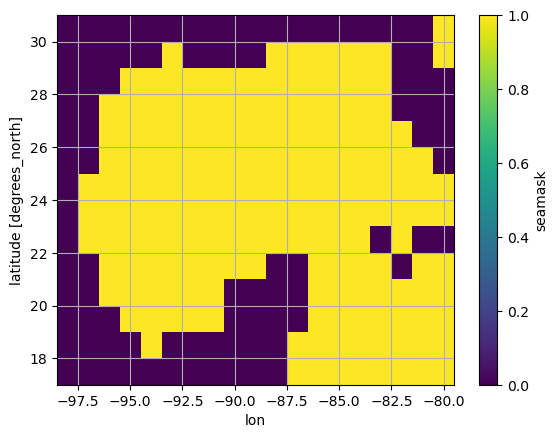

In [91]:
da.sel(lon=slice(-98, -80), lat=slice(17,31)).plot()
plt.grid()

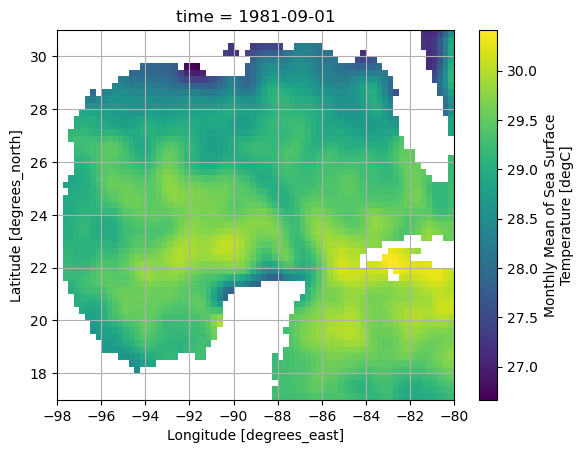

In [92]:
ds.sst[0].sel(lon=slice(-98, -80), lat=slice(17,31)).plot()
plt.grid()